In [1]:
# Run this cell two import the following modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

In [2]:
df = pd.concat(map(pd.read_csv, glob.glob('data-csv/*.csv')))
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,year,genre
0,0.386,0.452,2,-7.715,1,0.0278,0.4170,0.000000,0.0881,0.287,169.837,audio_features,5auMzVHFr5Zfw6IbKarZ56,spotify:track:5auMzVHFr5Zfw6IbKarZ56,https://api.spotify.com/v1/tracks/5auMzVHFr5Zf...,https://api.spotify.com/v1/audio-analysis/5auM...,279827,3,2005,acoustic
1,0.404,0.571,0,-5.069,1,0.0303,0.1820,0.000021,0.1290,0.290,147.010,audio_features,2WZyfujzMweFLnozyUJBkW,spotify:track:2WZyfujzMweFLnozyUJBkW,https://api.spotify.com/v1/tracks/2WZyfujzMweF...,https://api.spotify.com/v1/audio-analysis/2WZy...,245933,4,2005,acoustic
2,0.587,0.767,0,-5.713,1,0.0449,0.2250,0.000000,0.1120,0.664,100.380,audio_features,5p9XWUdvbUzmPCukOmwoU3,spotify:track:5p9XWUdvbUzmPCukOmwoU3,https://api.spotify.com/v1/tracks/5p9XWUdvbUzm...,https://api.spotify.com/v1/audio-analysis/5p9X...,201707,4,2005,acoustic
3,0.748,0.786,4,-7.788,0,0.0641,0.3280,0.000000,0.3400,0.917,104.833,audio_features,0qAMjeQFyd1qD0LDiV8gWp,spotify:track:0qAMjeQFyd1qD0LDiV8gWp,https://api.spotify.com/v1/tracks/0qAMjeQFyd1q...,https://api.spotify.com/v1/audio-analysis/0qAM...,172373,4,2005,acoustic
4,0.435,0.729,1,-4.818,0,0.0307,0.0152,0.000026,0.1100,0.524,188.017,audio_features,02acUMylPHMjJ9miDc9b38,spotify:track:02acUMylPHMjJ9miDc9b38,https://api.spotify.com/v1/tracks/02acUMylPHMj...,https://api.spotify.com/v1/audio-analysis/02ac...,256600,4,2005,acoustic


In [3]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
year                0
genre               0
dtype: int64

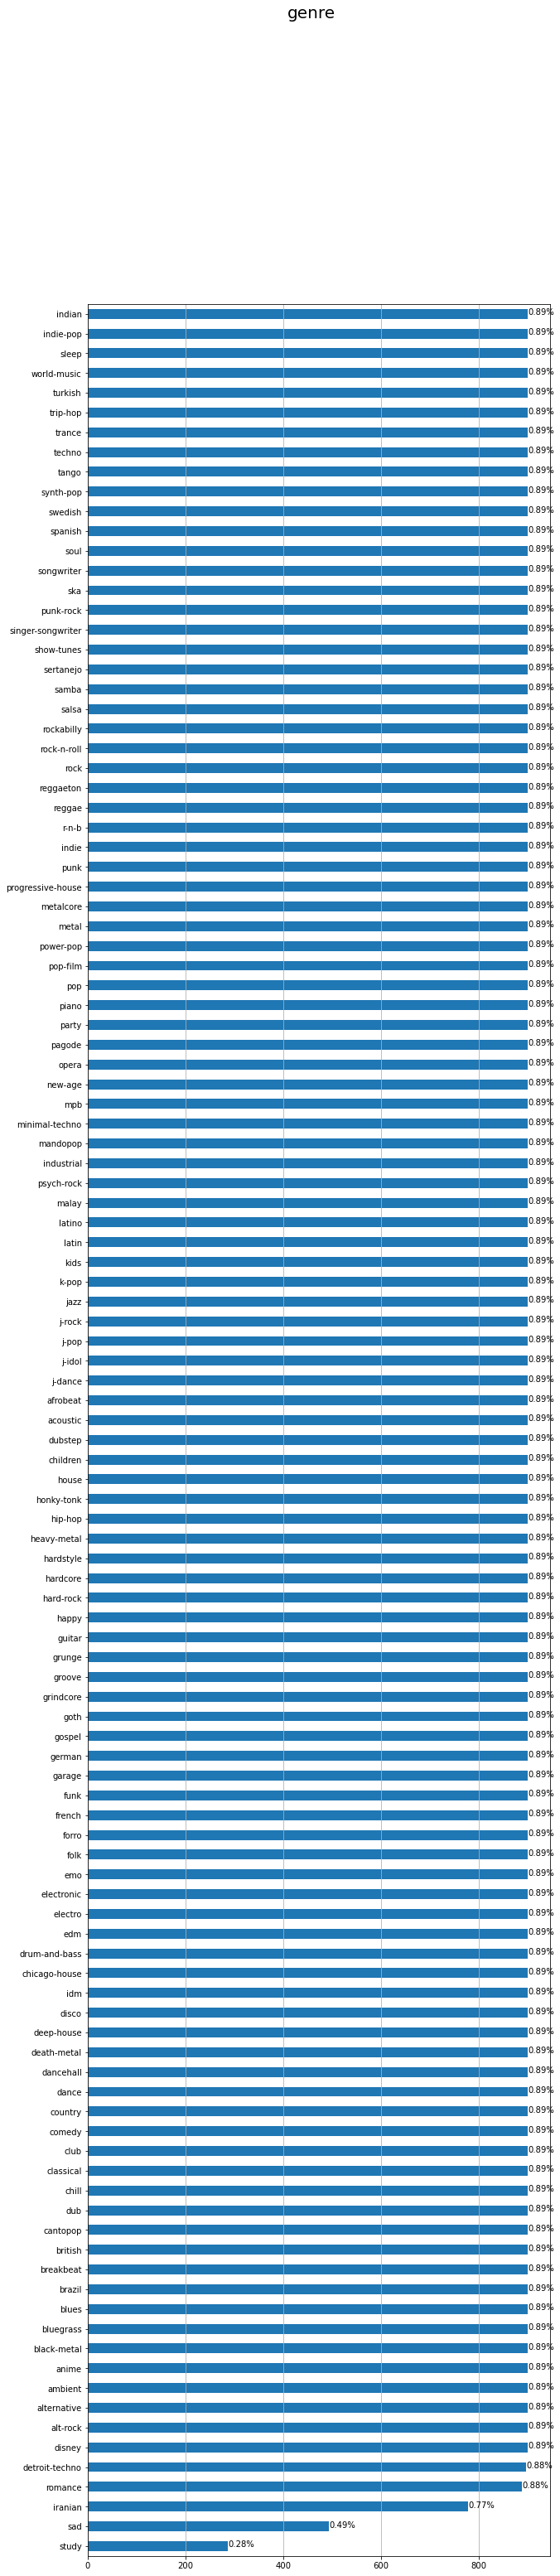

In [4]:
from matplotlib.pyplot import figure

y = "genre"
ax = df[y].value_counts().sort_values().plot(kind="barh",figsize = (10, 50))
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

In [5]:
df = df.drop('type',axis=1)
df = df.drop('id',axis=1)
df = df.drop('uri',axis=1)
df = df.drop('track_href',axis=1)
df = df.drop('analysis_url',axis=1)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,genre
0,0.386,0.452,2,-7.715,1,0.0278,0.4170,0.000000,0.0881,0.287,169.837,279827,3,2005,acoustic
1,0.404,0.571,0,-5.069,1,0.0303,0.1820,0.000021,0.1290,0.290,147.010,245933,4,2005,acoustic
2,0.587,0.767,0,-5.713,1,0.0449,0.2250,0.000000,0.1120,0.664,100.380,201707,4,2005,acoustic
3,0.748,0.786,4,-7.788,0,0.0641,0.3280,0.000000,0.3400,0.917,104.833,172373,4,2005,acoustic
4,0.435,0.729,1,-4.818,0,0.0307,0.0152,0.000026,0.1100,0.524,188.017,256600,4,2005,acoustic


In [6]:
print(df['genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie' 'indie-pop' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'r-n-b' 'reggae'
 'reggaeton' 'rock' 'rock-n-roll' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_Genre = df.apply(le.fit_transform)
print(df_Genre['genre'].unique())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 106 107 108
 109 110 111 112 113 105]


In [8]:
from sklearn.model_selection import train_test_split
X = df_Genre.drop('genre',axis=1)
y = df_Genre['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((81152, 14), (20289, 14), (81152,), (20289,))

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X_train_scaled = []
X_test_scaled = []
# Write Your Code Here
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = KNeighborsClassifier(n_neighbors=106)
knn = classifier.fit(X_train_scaled, y_train) 
# Predict y data with classifier: 
y_predict = knn.predict(X_test_scaled)
accuracy = knn.score(X_test_scaled, y_test)
print("Accuracy: "+str(accuracy))
# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

Accuracy: 0.1570801912366307
[[11  1  3 ...  3  0  3]
 [ 0 25  0 ... 10  1  1]
 [ 2  3  8 ...  1  2  6]
 ...
 [ 1 15  0 ... 22  0  1]
 [ 0  0  1 ...  5 19  0]
 [ 0  0  0 ...  1  1 58]]
              precision    recall  f1-score   support

           0       0.06      0.06      0.06       182
           1       0.10      0.14      0.12       178
           2       0.06      0.05      0.05       177
           3       0.03      0.01      0.02       176
           4       0.17      0.23      0.19       161
           5       0.20      0.08      0.12       178
           6       0.24      0.33      0.28       168
           7       0.11      0.24      0.15       185
           8       0.08      0.04      0.06       187
           9       0.05      0.01      0.02       189
          10       0.12      0.19      0.15       195
          11       0.05      0.01      0.01       186
          12       0.14      0.38      0.20       210
          13       0.23      0.29      0.25       206
    

In [11]:
# Import Gaussian Naive Bayes classifier:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
# Train the classifier:
model = gnb.fit(X_train_scaled, y_train)
# Make predictions with the classifier:
predictive_labels = model.predict(X_test_scaled)
print(predictive_labels)
# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictive_labels))

[71  0 19 ... 20 49 89]
0.15003203706441914


In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X_train_scaled, y_train)
dtree_predictions = dtree_model.predict(X_test_scaled)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)
print(accuracy_score(y_test, dtree_predictions))
print(dtree_model.score(X_test_scaled, y_test))

[[ 0  2  0 ...  0  0  5]
 [ 0 32  0 ...  0  0  0]
 [ 0  3  0 ...  0  0 21]
 ...
 [ 0 20  0 ...  0  0  2]
 [ 0  4  0 ...  0  0  1]
 [ 0  0  0 ...  0  0 57]]
0.13140125190990193
0.13140125190990193


In [ ]:
#Couldnt run this because it takes too long!
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
svm_predictions = svm_model_linear.predict(X_test_scaled)
 
# model accuracy for X_test 
print(accuracy_score(y_test, svm_predictions))
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(cm)